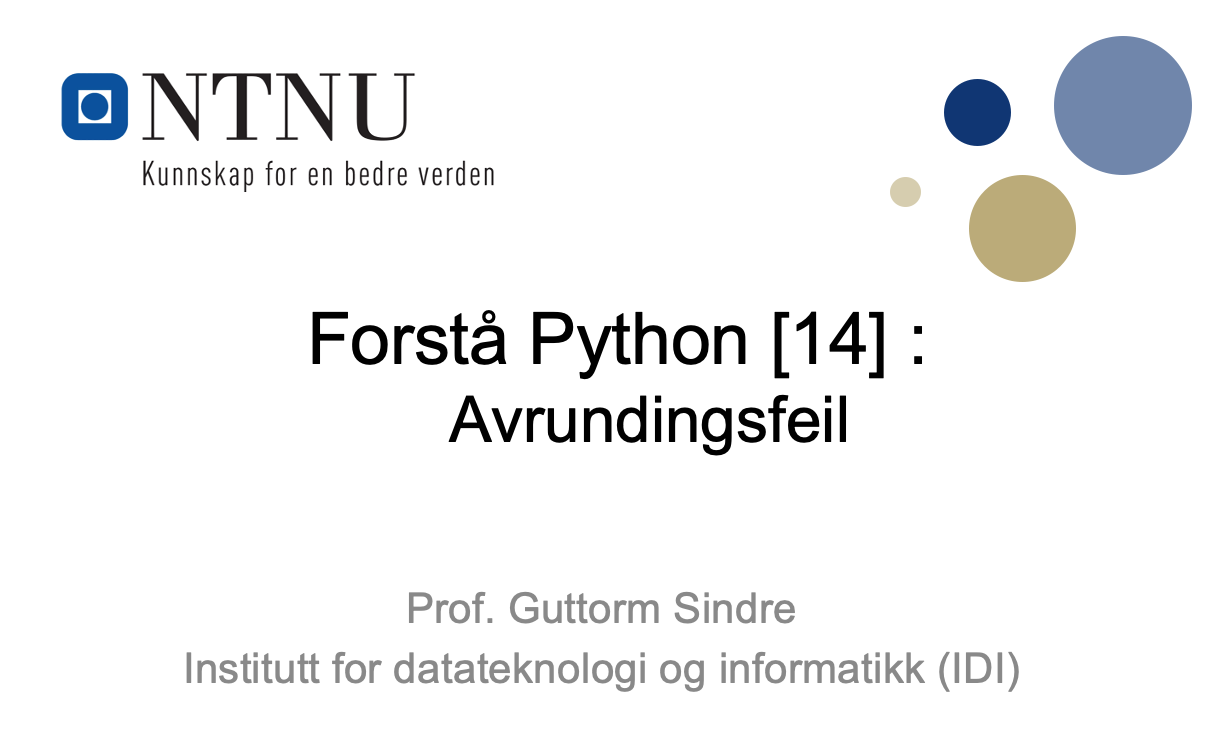

## Avrundingsfeil i representasjon av flyttall
Mange tall lar seg ikke representere eksakt. Dette gjelder
- irrasjonale tall som $\pi$ og $\sqrt{2}$. 
    - kan ikke representeres eksakt som brøker av heltall
    - uendelig mange desimaler uansett hvilket tallsystem vi velger
- rasjonale tall som __kunne__ ha vært representert eksakt som en brøk av heltall...
    - men __ikke__ i det binære tallsystemet, hvor nevneren i brøken må være en toerpotens. 
    - Kun brøker hvor nevneren er 2, 4, 8, 16, 32, ... blir eksakte i dette tallsystemet
        - mens f.eks. 0.1 (1/10) må representeres med en tilnærmet verdi, med avrundingsfeil
    - Omfanget av avrundingsfeilen kan illustreres ved å vise flere desimaler av tallet (som 19 nedenfor):

In [3]:
f'{0.1:.19f}' # kjør koden i cella for å se tallet

'0.1000000000000000056'

Det er denne typen avrundingsfeil som gjør at vi får overraskende resultat ved kjøring av koden under:

In [2]:
0.1 + 0.1 + 0.1 > 0.3

True

Grunnen til dette er at 0.1 ikke kan representeres eksakt, så tallet datamaskinen har, er bitte litte grann større.

0.3 kan heller ikke representeres eksakt, og er derimot bitte litte grann mindre:


In [ ]:
f'{0.3:.19f}' # kjør koden i cella for å se tallet

Dermed blir 0.1+0.1+0.1 større enn 0.3, ikke lik

## Hvordan begrense problemer med avrundingsfeil

Avrundingsfeil kan __ikke__ unngås
- når vi regner med tall som ikke kan representeres eksakt

Ofte er feilen så liten at det ikke utgjør noe praktisk problem. 

__MEN: Utregninger gjort på en dum måte, kan drastisk forverre avrundingsfeil__

I det nedenstående går vi gjennom noen typiske feller mhp avrundingsfeil

### Summere tall av svært ulik størrelse
Hvis vi summerer et stort tall og et mye mindre tall, vil det minste rett og slett forsvinne:

In [ ]:
x = 14000.0
y = 0.0000000000001
x + y

Ikke nødvendigvis noe problem
- avrundingsfeilen ved at y forsvinner utgjør en bitte liten del av totalresultatet
- forsøk på å representere tallet for summen direkte ville gi samme avrundingsfeil
    - jfr. at 1'eren er borte selv om vi viser mange desimaler:

In [ ]:
z = 14000.0000000000001
print(f'{z:.29f}')

__MEN:__ Hva om vi har ett stort tall som skal summeres med mange små tall? 

For enkelthets skyld viser vi her et eksempel hvor alle de små tallene er 0.0000000000001 (y).

Generelt kan vi tenke oss tusenvis av tall som skal summeres, til dels av svært ulik størrelsesorden

In [4]:
x = 14000.0
y = 0.0000000000001
stor_fremst = x + y + y + y + y + y + y + y + y + y + y + y + y
smaa_fremst = y + y + y + y + y + y + y + y + y + y + y + y + x
stor_fremst, smaa_fremst

(14000.0, 14000.000000000002)

Matematisk er rekkefølgen av leddene likegyldig i en summering av mange tall.

Beregningsmessig ser vi at de to ulike rekkefølgene ga ulikt resultat. 

Hvorfor?
- for variabelen __stor_fremst__ hadde vi x (14000.0) først, og adderte deretter inn ett og ett mye mindre tall - som alle bare forsvant i denne addisjonen.
- for variabelen __smaa_fremst__ summerte vi alle de små tallene først. Summen av de små ble etter hvert stor nok til å komme med i resultatet i addisjonen med det mye større tallet.

__Konklusjonen fra dette er at selv om to ulike rekkefølger i en utregninger kan være matematisk ekvivalente, kan det være stor forskjell i hva slags effekt de har på avrundingsfeil.__ For summering av tall av svært ulik størrelsesorden er det vanligvis lurt å ta de minste tallene først.

## Subtraksjon av to nesten like tall
På grunn av avrundingsfeil vil de bakerste sifrene av et tall gjerne være usikre eller feilaktige. For eksempel 0.1 som i datamaskinen vil være noe i nærheten av 0.1000000000000000056 - hvor de bakerste sifrene 56 rett og slett er feil. 

Problemet når vi subtraherer to nesten like tall, er at vi blir sittende igjen med __bare__ de bakerste sifrene. 

I eksemplet under skulle a og b ha vært like hvis det ikke skjedde avrundingsfeil, og diffen skulle da ha blitt null.

In [ ]:
a = 0.1 + 0.1 + 0.1
b = 0.3
summen = a + b
diffen = a - b
print(f'{summen * 100:.19f}')
print(f'Prosentmessig feil: {0.0000000000000071054 / 60 * 100:.15f}')
print(f'{diffen * 1e18:.19f}')
print('Prosentmessig feil: uendelig (skulle vært 0)')

Som vi ser ga addisjonen, fulgt av ganging med 100, et svar svært nær det korrekte 60
- noen gale sifre, men de er __langt bak__ det første tellende sifferet
- for de fleste praktiske formål vil dette være ok, prosentmessig avvik fra rett svar er som vi ser svært lite

Subtraksjonen gir et svar som riktignok er nærme null, men allerede det første tellende sifferet er helt feil
- hvis dette var en mellomregning, kan feilen senere ganges opp til et mye større tall
- som f.eks. 55 vist over - og her er allerede første tellende siffer helt feil

__Hvis en formel inkluderer subtraksjon av to nesten like tall, vurder å skrive om formelen så det regnes ut på en annen måte__

__Eksempel på omskriving av formel__: Det neste regnestykket viser bruk av den vanlige andregradsformelen

$x = \frac{-b \pm \sqrt{b^{2} - 4ac}}{2a}$

for å løse likningen

$x^{2} - 100000x + 1 = 0$ 

In [ ]:
import numpy as np
a = 1.0
b = -100000.0
c = 1.0
r1 = (-b + np.sqrt(b**2 - 4*a*c))/(2*a)
r2 = (-b - np.sqrt(b**2 - 4*a*c))/(2*a)
alt_r2 = 1/r1
r1, r2, alt_r2

Forklaring på hva som skjedde her, hvorfor gir __r2__ og __alt_r2__ ulike resultat?

b (-100000) er mange størrelsesordener større enn a og c, så
- $b^{2}$ blir svært dominerende under kvadratrota, 
- og $\sqrt{b^{2} - 4ac}$ blir et tall svært nærme 100000.

Formelen for __r1__ legger sammen to nesten like tall (uproblematisk), liten avrundingsfeil i tiende siffer. 

Formelen for __r2__ subtraherer de to nesten like tallene, større avrundingsfeil allerede i åttende siffer. 

Den alternative utregningsmåten __alt_r2__ får et mer nøyaktig svar
- For en andregradslikning gjelder $r1r2 = c/a$, og siden c/a er 1 her, vil r2 kunne regnes ut som 1/r1

__Konklusjon: Subtraksjon av to nesten like tall kan forverre avrundingsfeil. Prøv å skrive om formlene dine for å unngå dette.__

## Hvordan unngå overflyt og underflyt
Med ganging og deling skjer det i mindre grad problemer med avrundingsfeil (annet enn videreføring av avrundingsfeil vi alt har). Ganging og deling kan derimot gi problemer med
- __overflyt:__ tallet blir for stort til at det kan reprensenteres med den typen flyttall vi bruker
- __underflyt:__ tallet blir for lite til at det kan representeres

Hva som er maksimal og minimal størrelse på flyttall i Python kan sjekkes med sys.float_info som vist nedenfor:


In [ ]:
import sys
print(sys.float_info.max)
print(sys.float_info.min)

Som vi ser ved kjøring av koden over:
- det største tallet som kan representeres ca. $1.79\cdot10^{308}$
- det minste er ca. $2.2\cdot10^{-308}$. 

Overflyt kan typisk forekomme ved
- multiplikasjon av to store tall
- divisjon av et stort tall på et lite tall (mye mindre enn 1) 


Underflyt kan typisk forekomme ved 
- multiplikasjon av to små tall
- divisjon med lite tall over stort tall

Eksemplet under illustrerer at ulike rekkefølger av en multiplikasjon av fire tall gir ulikt resultat.

Matematisk er faktorenes orden likegyldig, men beregningsmessig er en rekkefølge klart lurere enn de andre her. 

In [5]:
a = 2.34e200 
b = 3.21e199
c = 4.02e-200
d = 1.79e-201
print(f'Store først: {a*b*c*d}')
print(f'Små først: {c*d*a*b}')
print(f'Annen hver: {a*c*b*d}')

Store først: inf
Små først: 0.0
Annen hver: 0.5405053212


Som vi kan se av resultatet over: 
- store tall først gir resultatet __inf__ (infinity, dvs. uendelig) på grunn av overflyt
- små tall først gir resultatet __0.0__ på grunn av underflyt
- annen hver gir derimot svaret 0.5405053212, som er det vi skal få i denne sitausjonen

Merk at man __ikke__ får feilmelding under kjøring av programmet ved over- eller underflyt
- effekten blir bare at man plutselig sitter med et feil resultat (f.eks. 0 ved underflyt). 

__Konklusjonen: med spesielt store eller små tall, hvor over- eller underflyt kan forekomme:__
- __tenk over rekkefølgen på utregningen slik at delresultater holdes nærmest mulig 1.__

